In [1]:
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%config InlineBackend.figure_format = 'retina'
import numpy

# @title Figure settings
import ipywidgets as widgets  # interactive display
from ipywidgets import interact, fixed, HBox, Layout, VBox, interactive, Label, interact_manual
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/content-creation/main/nma.mplstyle")



with open('slice_data.pickle', 'rb') as handle:
    raw_data = pickle.load(handle)


data = raw_data['PPC_RS']
n_column = data.iloc[0,:].size
starting_index = np.arange (1,n_column+1, 15)
cell_list = []

#separate the cells from one sheet

for i in starting_index:
    cell_data = data.iloc[:,i:i+13]
    cell_list.append(cell_data)


clamp_levels = data.iloc[0,1:14]
clamp_levels_string = pd.Series(clamp_levels, dtype="string")
col_list = list(clamp_levels_string)

In [2]:
def into_dict(data):
    n_column = data.iloc[0,:].size
    starting_index = np.arange (1,n_column+1, 15)

    cell_list = []
    clamp_levels = data.iloc[0,1:14]
    clamp_levels_string = pd.Series(clamp_levels, dtype="string")
    col_label = list(clamp_levels_string)


    #separate the cells from one sheet

    for i in starting_index:
        cell_data = data.iloc[:,i:i+13]
        cell_list.append(cell_data)

    num_neuron = len(cell_list)
    cell_id_list = []


    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)


    num_neuron = len(cell_list)
    cell_id_list = []
    for i in range(num_neuron):
        col_list = list(cell_list[i].columns)
        cell_id = col_list[0]
        cell_id_list.append(cell_id)
        sheet_time = data.iloc[1:,0]


    for i in range(num_neuron):
        cell_list[i].columns = col_label
        cell_list[i] = cell_list[i].iloc[1:,:]


    cell_dic = {}

    cell_dic['time'] = sheet_time
    cell_dic['data'] = cell_list
    cell_dic['cell_id'] =  cell_id_list

    return cell_dic

In [3]:
ppc_rs = into_dict(raw_data['PPC_RS'])
acc_rs = into_dict(raw_data['ACC_RS'])

acc_fs = into_dict(raw_data['ACC_FS'])
ppc_fs = into_dict(raw_data['PPC_FS'])

In [4]:
# remove one item first and second, and third 

def remove_cell(data_set, remove_list):
    
    # sort the index based on order 
    
    remove_list.sort()
    
    num_deleted = 0
    
    for i in remove_list:
        i = i - num_deleted
        data_set['data'].pop(i)
        data_set['cell_id'].pop(i)
        num_deleted += 1
        print(num_deleted)
    
    return data_set
    
    

In [5]:
remove_list = [0, 5, 10]


In [6]:
_= remove_cell(acc_rs, remove_list)


1
2
3


In [7]:
def before_sweep(input_data, start, end):
    
    output = []
    cell_num = len(input_data['data'])
    

    for i in range(cell_num):
        
        output.append(input_data['data'][i]['-200.0'].iloc[start:end])
    
    return output

In [8]:
before_sweep_acc = before_sweep(acc_rs, 0, 1000)


In [9]:
before_sweep_ppc = before_sweep(ppc_rs, 0, 1000)


In [10]:
# take out all rmp values 


def take_rmp(input_data, start, end, trial_num):


    num_time = len(input_data['data'][0]['-200.0'].iloc[start:end])

    rmp_mat = numpy.zeros([trial_num, num_time])

    for i in range(trial_num):
        
        #plt.plot(input_data['time'].iloc[start:end], input_data['data'][i]['-200.0'].iloc[start:end], 'c', alpha = 0.3, linewidth= 2)
        #plt.plot(input_data['time'].iloc[start:end], input_data['data'][point_idx]['-200.0'].iloc[start:end], 'r', alpha = 0.7, linewidth= 2)

        rmp_mat[i,:] = input_data['data'][i]['-200.0'].iloc[start:end]
    
    return rmp_mat
        
        


In [11]:
ppc_all_rmp = take_rmp(ppc_rs, 0, 1000, 19)

In [12]:
acc_all_rmp = take_rmp(acc_rs, 0, 1000, 13)

In [13]:
ppc_mean_rmp_by_trials = numpy.mean(ppc_all_rmp, axis = 1)
acc_mean_rmp_by_trials = numpy.mean(acc_all_rmp, axis = 1)


In [14]:
ppc_rmp_mean = ppc_mean_rmp_by_trials.mean()
acc_rmp_mean = acc_mean_rmp_by_trials.mean()


n_acc = len(acc_mean_rmp_by_trials)
n_ppc = len(ppc_mean_rmp_by_trials)

acc_rmp_sem = numpy.std(acc_mean_rmp_by_trials)/numpy.sqrt(n_acc)
ppc_rmp_sem = numpy.std(ppc_mean_rmp_by_trials)/numpy.sqrt(n_ppc)





In [15]:
error_bars = [acc_rmp_sem,ppc_rmp_sem ]

In [26]:
import matplotlib

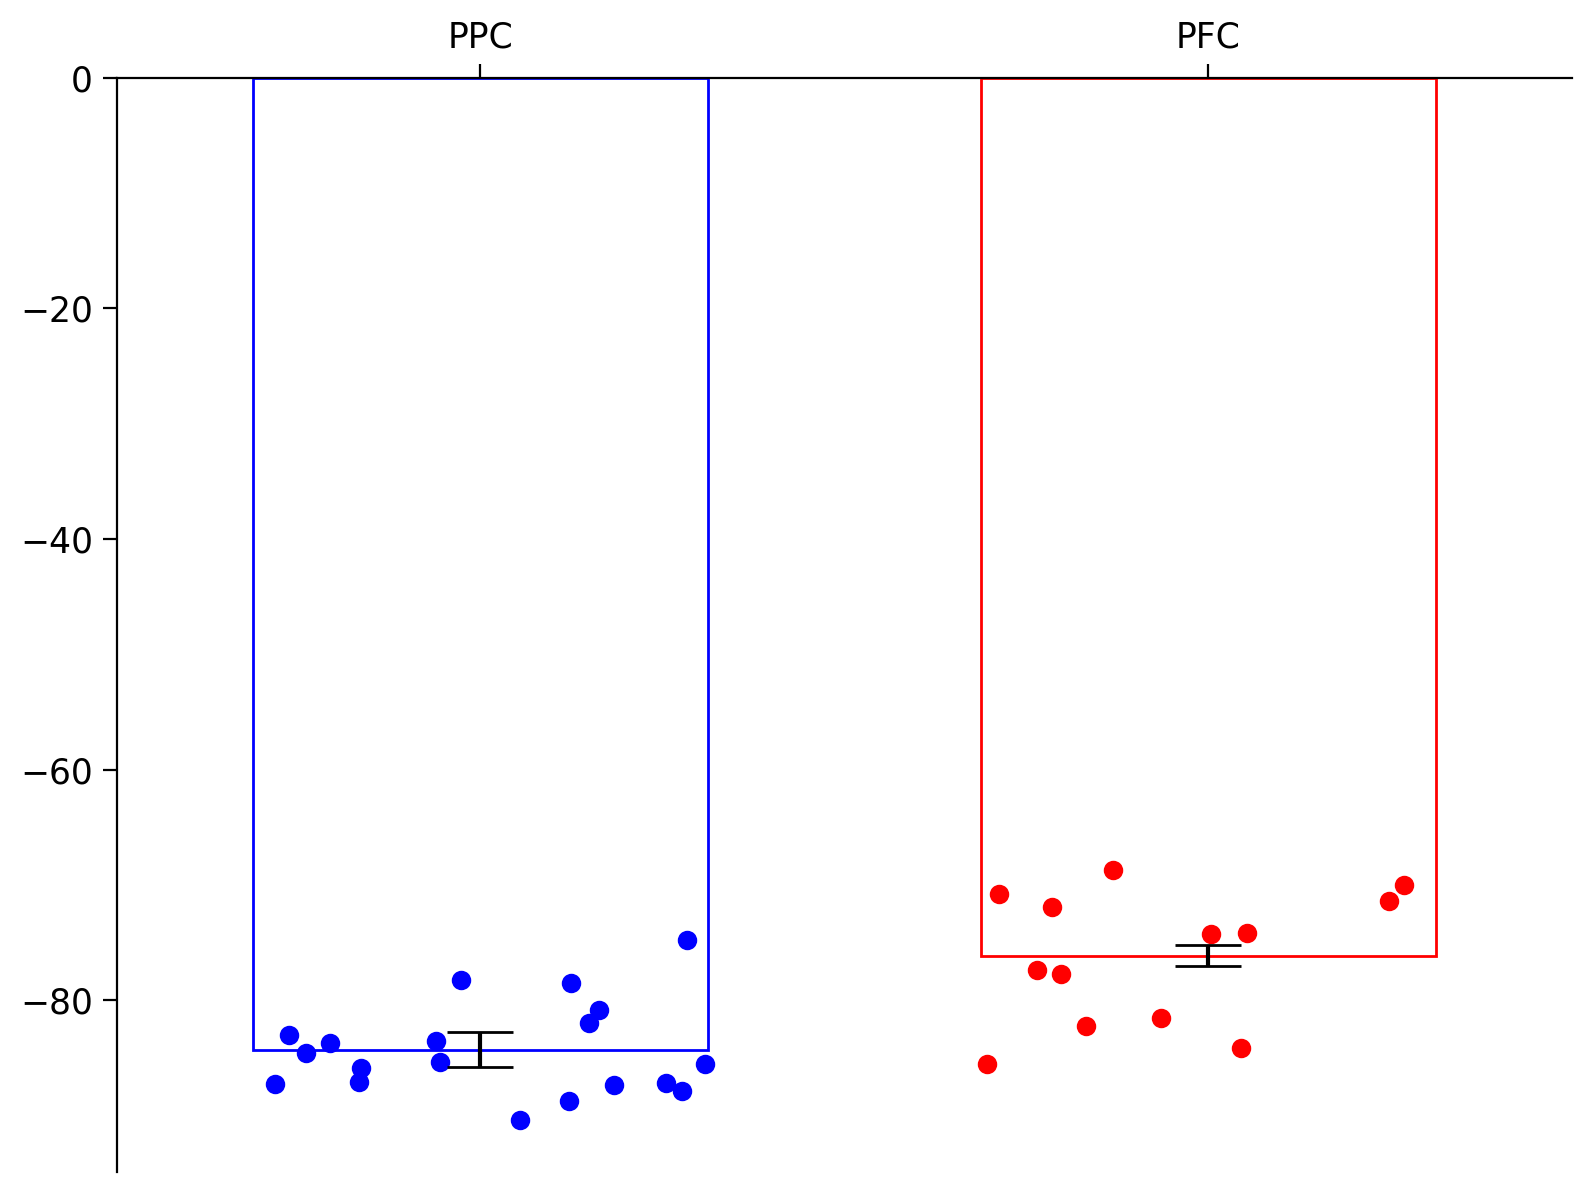

In [44]:
import matplotlib.pyplot as plt
#np.random.seed(123)

plt.style.use('https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle')


w = 0.25    # bar width
x = [0.2, 0.6] # x-coordinates of your bars
colors = [(0, 0, 1, 1), (1, 0, 0, 1)]    # corresponding colors
mean_bars = [ppc_rmp_mean,       # data series
    acc_rmp_mean]

y = ([ppc_mean_rmp_by_trials,       # data series
    acc_mean_rmp_by_trials])


fig, ax = plt.subplots()

ax.bar(x,
       height= mean_bars,
       yerr=error_bars,    # error bars
       capsize=12, # error bar cap width in points
       width=w,    # bar width
       tick_label=["PPC", "PFC"],
       color=(0,0,0,0),  # face color transparent
       edgecolor=colors,
       #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
       )
ax.xaxis.tick_top()
#axes.spines.top = True

ax.spines.top.set_visible(True)
ax.spines['bottom'].set_visible(False)

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title 


for i in range(len(x)):
    # distribute scatter randomly across whole width of bar
    ax.scatter(x[i] + np.random.random(y[i].size) * w - w / 2, y[i], color=colors[i])
    
plt.xlim([0, 0.8])
plt.show()



##### 

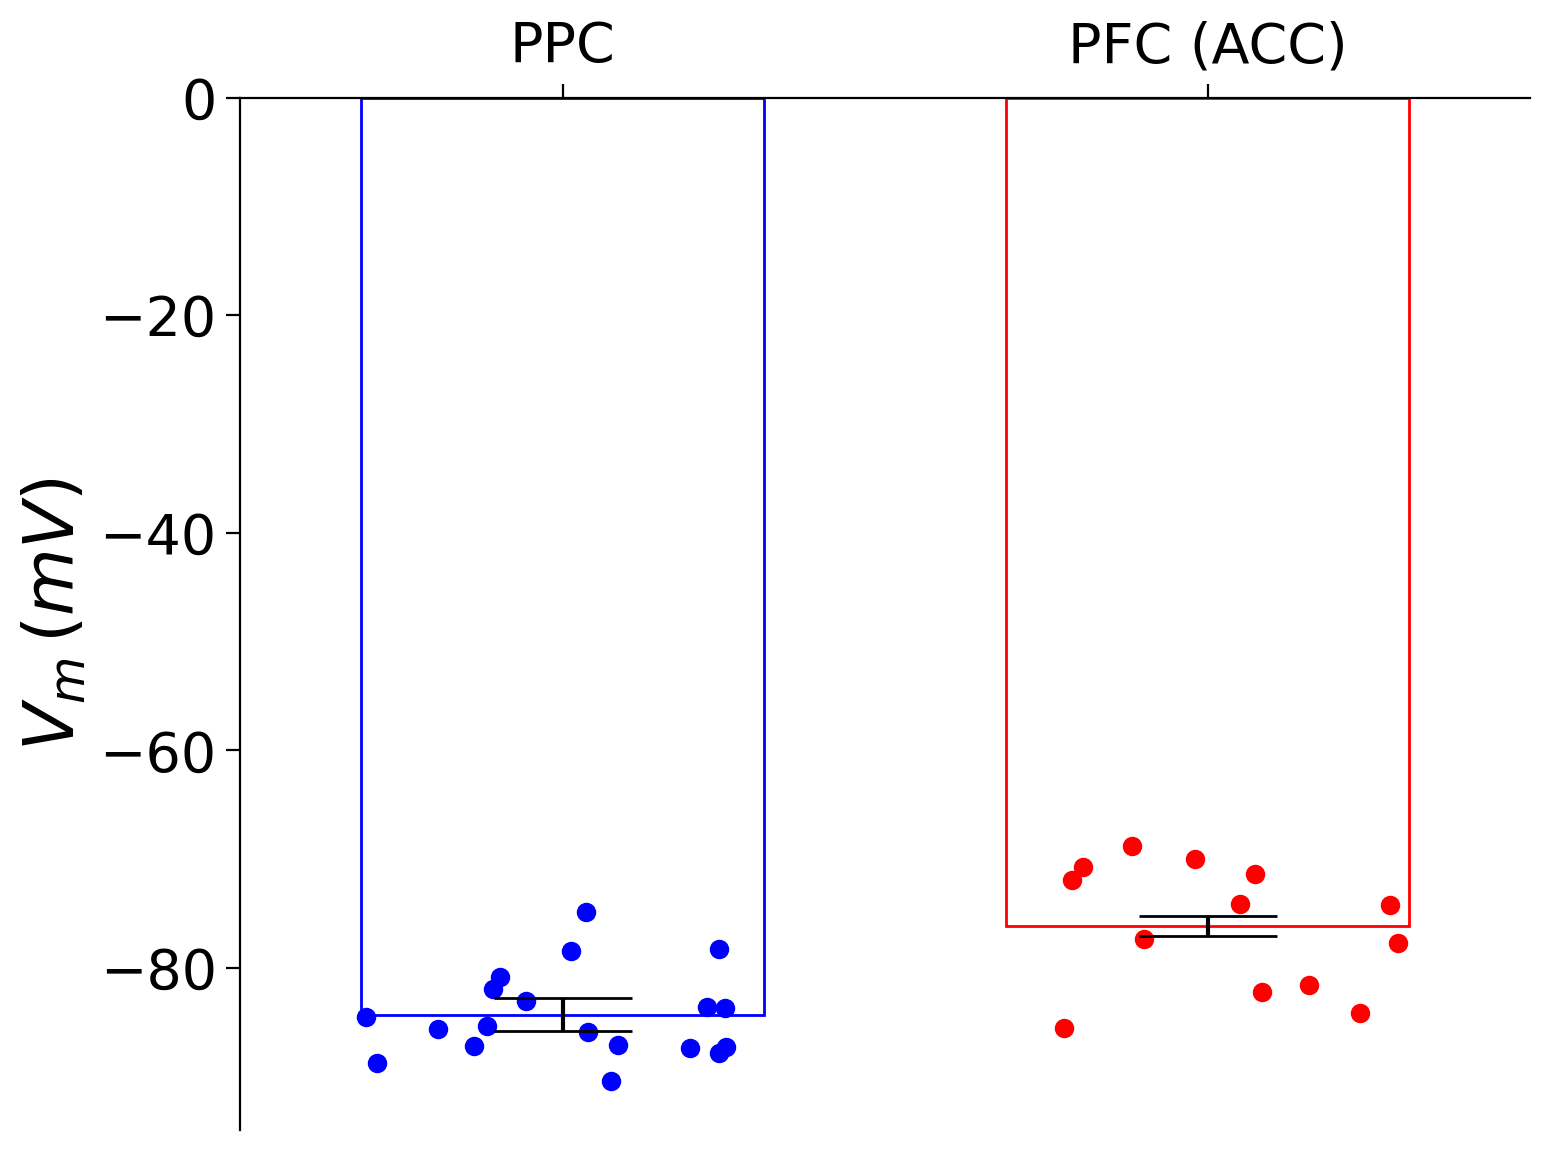

In [73]:
import matplotlib.pyplot as plt
#np.random.seed(123)

plt.style.use('https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle')


w = 0.25    # bar width
x = [0.2, 0.6] # x-coordinates of your bars
colors = [(0, 0, 1, 1), (1, 0, 0, 1)]    # corresponding colors
mean_bars = [ppc_rmp_mean,       # data series
    acc_rmp_mean]

y = ([ppc_mean_rmp_by_trials,       # data series
    acc_mean_rmp_by_trials])


fig, ax = plt.subplots()

ax.bar(x,
       height= mean_bars,
       yerr=error_bars,    # error bars
       capsize=25, # error bar cap width in points
       width=w,    # bar width
       tick_label=["PPC", "PFC (ACC)"],
       color=(0,0,0,0),  # face color transparent
       edgecolor=colors,
       #ecolor=colors,    # error bar colors; setting this raises an error for whatever reason.
       )
ax.xaxis.tick_top()
#axes.spines.top = True

ax.spines.top.set_visible(True)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=20)


for i in range(len(x)):
    # distribute scatter randomly across whole width of bar
    ax.scatter(x[i] + np.random.random(y[i].size) * w - w / 2, y[i], color=colors[i])

    
plt.ylabel('$V_{m}\,(mV)$', fontsize=25)

plt.xlim([0, 0.8])
plt.show()




In [74]:
def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)

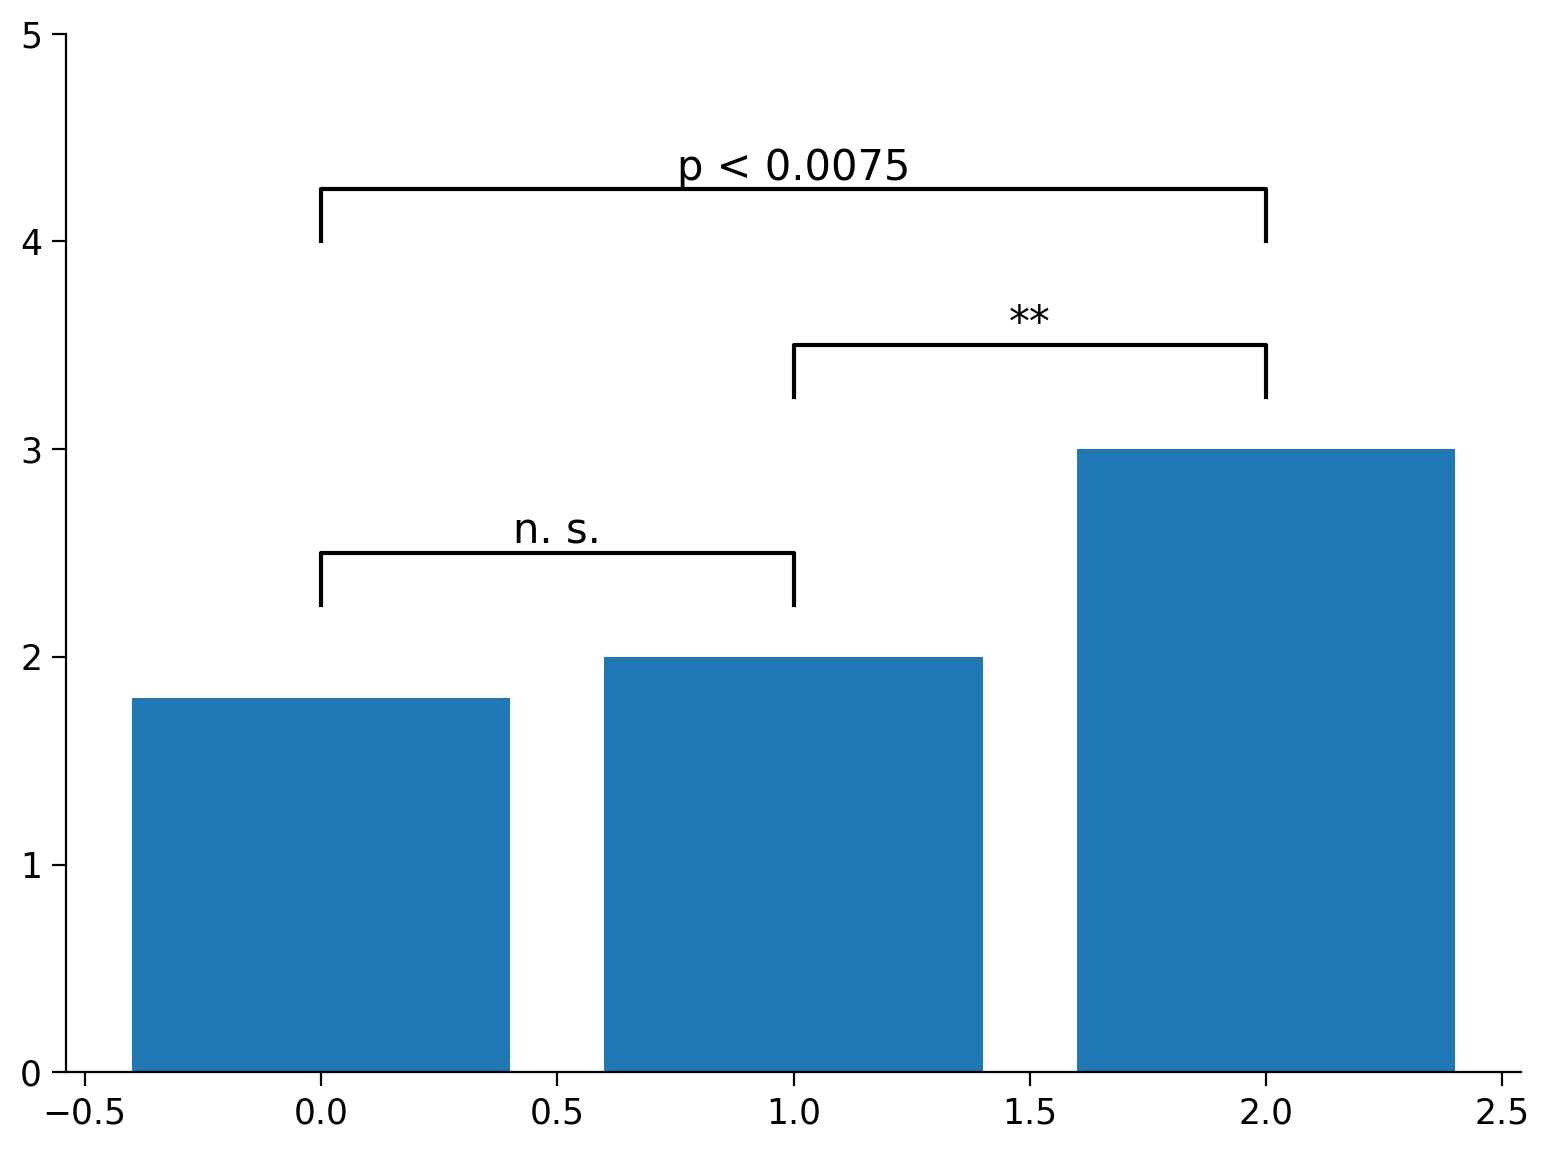

In [75]:
heights = [1.8, 2, 3]
bars = np.arange(len(heights))

plt.figure()
plt.bar(bars, heights, align='center')
plt.ylim(0, 5)
barplot_annotate_brackets(0, 1, .1, bars, heights)
barplot_annotate_brackets(1, 2, .001, bars, heights)
barplot_annotate_brackets(0, 2, 'p < 0.0075', bars, heights, dh=.2)

In [76]:
import scipy.stats


In [77]:
scipy.stats.ttest_ind(ppc_mean_rmp_by_trials, acc_mean_rmp_by_trials, equal_var=False)

Ttest_indResult(statistic=-4.456697080527827, pvalue=0.00024416738522871486)

In [126]:
import random

array1 = [(random.randint(1, 100)) for i in range(20)]
array2 = [(random.randint(1, 100)) for i in range(10)]



In [127]:
scipy.stats.ttest_ind(array1, array2, equal_var=False)

Ttest_indResult(statistic=-1.720512642135639, pvalue=0.1039442643889808)

In [125]:
array2

[39, 15, 20, 60, 35, 72, 1, 60, 31, 55]